In [ ]:
import numpy as np
import pandas as pd

In [26]:
df=pd.read_csv("C:\\Users\\choud\\Desktop\\jupter_files\\iris.csv")
df.rename(columns={"150":"Sepa_len","4":"Sepa_widt","setosa":"Pet_len","versicolor":"Pet_widt","virginica":"Species"}, inplace=True)
df

,Sepa_len,Sepa_widt,Pet_len,Pet_widt,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

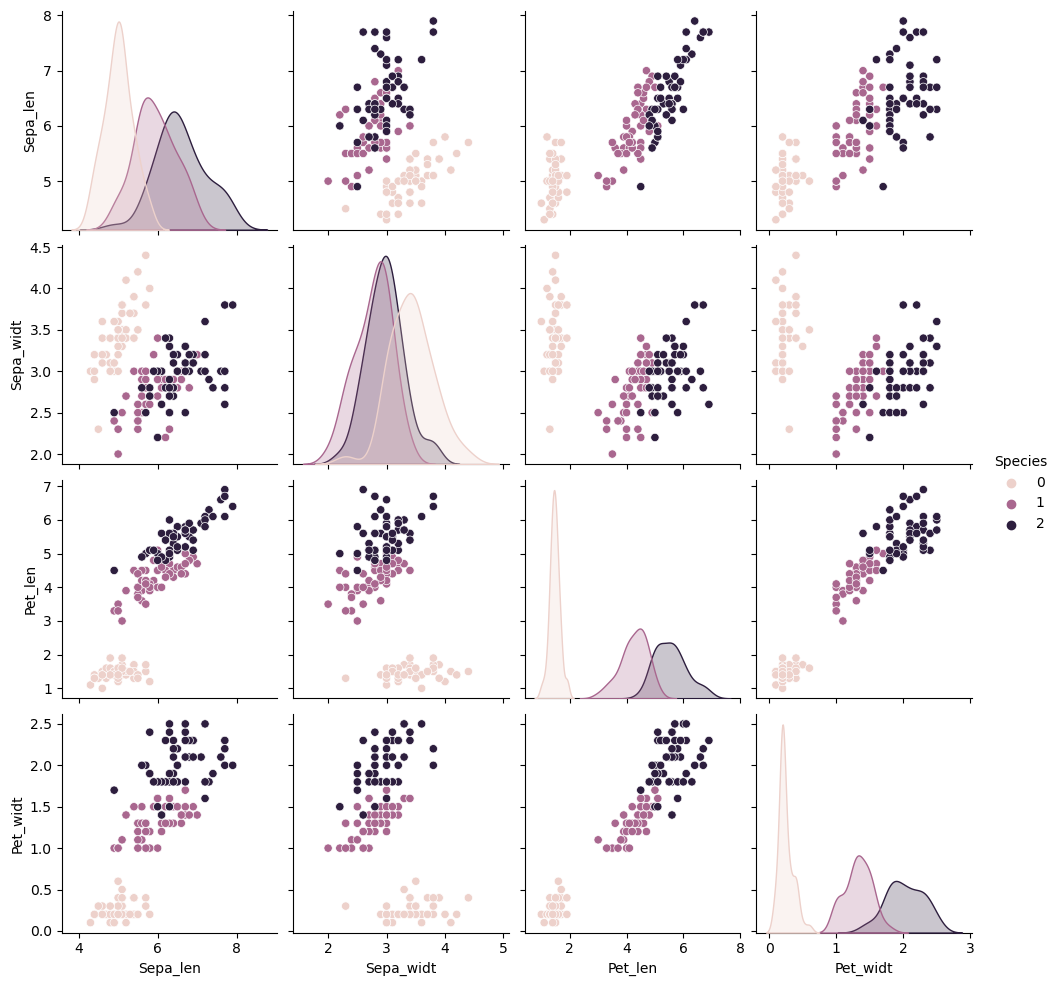

In [27]:
import seaborn as sns
sns.pairplot(df,hue="Species")

In [28]:
new_df=df[df["Species"] !=0][["Sepa_len","Sepa_widt","Species"]]

In [29]:
new_df.head(10)

,Sepa_len,Sepa_widt,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
55,5.7,2.8,1
56,6.3,3.3,1
57,4.9,2.4,1
58,6.6,2.9,1
59,5.2,2.7,1


In [39]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [40]:
new_df.shape

(100, 3)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [42]:
clf1_lr=LogisticRegression()
clf2_RFC= RandomForestClassifier()
clf3_KNC=KNeighborsClassifier()


In [43]:
estimators = [("lr",clf1_lr),("rf",clf2_RFC),("knn",clf3_KNC)]

In [44]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,Y,cv=10,scoring="accuracy")
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.71
knn 0.76


In [45]:
from sklearn.ensemble import VotingClassifier


HARD VOTING

In [51]:
VCh= VotingClassifier(estimators= estimators, voting = "hard")
x=cross_val_score(VCh,X,Y,cv =10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


Soft Voting

In [52]:
VCs= VotingClassifier(estimators= estimators, voting = "soft")
x=cross_val_score(VCs,X,Y,cv =10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


Weighted Voting

In [56]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vcw= VotingClassifier(estimators=estimators, voting = "soft", weights=[i,j,k])
            x=cross_val_score(vcw,X,Y,cv=10,scoring="accuracy")
            print("for i={}, j={}, k={}".format(i,j,k) , np.round(np.mean(x),2))

for i=1, j=1, k=1 0.77
for i=1, j=1, k=2 0.77
for i=1, j=1, k=3 0.76
for i=1, j=2, k=1 0.74
for i=1, j=2, k=2 0.76
for i=1, j=2, k=3 0.75
for i=1, j=3, k=1 0.73
for i=1, j=3, k=2 0.75
for i=1, j=3, k=3 0.76
for i=2, j=1, k=1 0.78
for i=2, j=1, k=2 0.77
for i=2, j=1, k=3 0.77
for i=2, j=2, k=1 0.77
for i=2, j=2, k=2 0.77
for i=2, j=2, k=3 0.77
for i=2, j=3, k=1 0.75
for i=2, j=3, k=2 0.77
for i=2, j=3, k=3 0.77
for i=3, j=1, k=1 0.81
for i=3, j=1, k=2 0.78
for i=3, j=1, k=3 0.79
for i=3, j=2, k=1 0.78
for i=3, j=2, k=2 0.78
for i=3, j=2, k=3 0.77
for i=3, j=3, k=1 0.77
for i=3, j=3, k=2 0.77
for i=3, j=3, k=3 0.77


weighted voting

In [57]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vcw= VotingClassifier(estimators=estimators, voting = "hard", weights=[i,j,k])
            x=cross_val_score(vcw,X,Y,cv=10,scoring="accuracy")
            print("for i={}, j={}, k={}".format(i,j,k) , np.round(np.mean(x),2))

for i=1, j=1, k=1 0.77
for i=1, j=1, k=2 0.76
for i=1, j=1, k=3 0.76
for i=1, j=2, k=1 0.75
for i=1, j=2, k=2 0.77
for i=1, j=2, k=3 0.76
for i=1, j=3, k=1 0.72
for i=1, j=3, k=2 0.75
for i=1, j=3, k=3 0.77
for i=2, j=1, k=1 0.79
for i=2, j=1, k=2 0.77
for i=2, j=1, k=3 0.76
for i=2, j=2, k=1 0.77
for i=2, j=2, k=2 0.77
for i=2, j=2, k=3 0.76
for i=2, j=3, k=1 0.75
for i=2, j=3, k=2 0.77
for i=2, j=3, k=3 0.77
for i=3, j=1, k=1 0.81
for i=3, j=1, k=2 0.78
for i=3, j=1, k=3 0.77
for i=3, j=2, k=1 0.79
for i=3, j=2, k=2 0.77
for i=3, j=2, k=3 0.77
for i=3, j=3, k=1 0.77
for i=3, j=3, k=2 0.77
for i=3, j=3, k=3 0.77


Classifier of some Algo

In [61]:
from sklearn.datasets import make_classification
a,b = make_classification(n_samples=1000,n_features=20,n_informative = 15, n_redundant=5,random_state=2)


In [62]:
from sklearn.svm import SVC

In [65]:
svm1=SVC(probability=True, kernel='poly',degree=1)
svm2=SVC(probability=True,kernel='poly',degree=2)
svm3=SVC(probability=True,kernel='poly',degree=3)
svm4=SVC(probability=True,kernel='poly',degree=4)
svm5=SVC(probability=True,kernel='poly',degree=5)

estimators=[('svm1',svm1),("svm2",svm2),('svm3',svm3),("svm4",svm4),('svm5',svm5)]

for estimator in estimators:
    x=cross_val_score(estimator[1],X,Y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.82
svm2 0.81
svm3 0.81
svm4 0.8
svm5 0.79


In [69]:
VCs= VotingClassifier(estimators= estimators, voting = "soft")
x=cross_val_score(VCs,X,Y,cv =10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.81


In [66]:
for estimator in estimators:
    x=cross_val_score(estimator[1],a,b,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [68]:
VCs= VotingClassifier(estimators= estimators, voting = "soft")
x=cross_val_score(VCs,a,b,cv =10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
